## NLP for text documents

Figure: BERT model in NLP
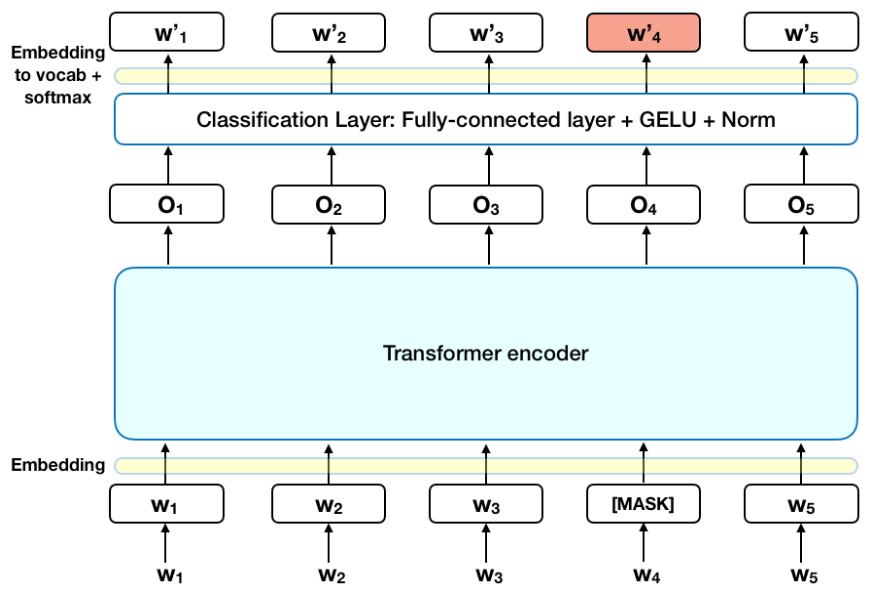

Natural language processing (NLP) enables computers to understand, interpret, generate, and respond to human language in a valuable way.

The goal of NLPis a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. Examples including: Syntax and Semantics understanding, speech recognition, machine translation, named entity recognition, sentiment analysis, coreference resolution, question answering. 

In the following exercise, we will try a few of NLP tools on the dataset we had extracted. 

In [1]:
!pip install spacy

  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/f5/8f/96f8f02c4719ad48973eb509b2bdaf7afe68447b54cb30f00420032c9c12/spacy-3.7.2-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/ed/9d/d62d12e3ecc6f99eddea6289413669a905d2ebb15cf9fe075336ca6cceaa/murmurhash-1.0.10-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/51/12/4aa9eec680c6d12b2275d479e159c3d063d7c757175063dd45386e15b39d/cymem-2.0.8-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for preshed<3.1.0,>=3.0.2 from https://files.pythonhosted.org/packages/f3/72/108426ca3b6


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Load document

In [3]:
import os
from PIL import Image  # Make sure to import the Image module
import matplotlib.pyplot as plt

# import training image
def locate_child_file(child_folder, file_name):
    """This function assumes that the file is located in the same directory as the script.
    The file is packed within a folder. No nested folder is allowed."""
    script_directory = os.getcwd()
    # os.path.join() method in Python join one or more path components intelligently. It returns a string representing the path to a file.
    return os.path.join(script_directory, child_folder, file_name)

sample_txt = locate_child_file('Txt', 'humanity_paper.txt')

# Read the content of the text file
try:
    with open(sample_txt, 'r', encoding='utf-8') as file:
        file_content = file.read()
        print("File Content:")
        print(file_content)
except FileNotFoundError:
    print(f"The file '{sample_txt}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")




File Content:
Technological Forecasting & Social Change 186 (2023) 122154
Available online 17 November 2022
0040-1625/© 2022 Elsevier Inc. All rights reserved.Examining the role of virtue ethics and big data in enhancing viable, 
sustainable, and digital supply chain performance 
Surajit Baga,b,*, Muhammad Sabbir Rahmanc, Gautam Srivastavad, Adam Shoree, 
Pratibha Ramf 
aCentre for Data Science, Institute of Management Technology, Ghaziabad, India 
bDepartment of Transport and Supply Chain Management, University of Johannesburg, South Africa 
cDepartment of Marketing and International Business, School of Business and Economics, North South University, Dhaka, Bangladesh 
dIILM Graduate School of Management, 16, Knowledge Park II, Greater Noida, Uttar Pradesh 201306, India 
eFaculty of Business and Law, Liverpool Business School, United Kingdom of Great Britain and Northern Ireland 
fDepartment of Materials, Alliance Manchester Business School, United Kingdom of Great Britain and Norther

## Tokenization

In [12]:
!pip install nltk


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

# Download NLTK resources (you need to do this once)
nltk.download('punkt')


# Tokenize sentences
sentences = sent_tokenize(file_content)

# Tokenize words in each sentence
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
print(tokenized_sentences)

# Print tokenized sentences
for i, sentence in enumerate(tokenized_sentences, start=1):
    print(f"Sentence {i}: {sentence}")

# Print tokenized words
all_words = word_tokenize(sample_txt)
print(f"\nAll Tokenized Words: {all_words}")

[['Technological', 'Forecasting', '&', 'Social', 'Change', '186', '(', '2023', ')', '122154', 'Available', 'online', '17', 'November', '2022', '0040-1625/©', '2022', 'Elsevier', 'Inc.', 'All', 'rights', 'reserved.Examining', 'the', 'role', 'of', 'virtue', 'ethics', 'and', 'big', 'data', 'in', 'enhancing', 'viable', ',', 'sustainable', ',', 'and', 'digital', 'supply', 'chain', 'performance', 'Surajit', 'Baga', ',', 'b', ',', '*', ',', 'Muhammad', 'Sabbir', 'Rahmanc', ',', 'Gautam', 'Srivastavad', ',', 'Adam', 'Shoree', ',', 'Pratibha', 'Ramf', 'aCentre', 'for', 'Data', 'Science', ',', 'Institute', 'of', 'Management', 'Technology', ',', 'Ghaziabad', ',', 'India', 'bDepartment', 'of', 'Transport', 'and', 'Supply', 'Chain', 'Management', ',', 'University', 'of', 'Johannesburg', ',', 'South', 'Africa', 'cDepartment', 'of', 'Marketing', 'and', 'International', 'Business', ',', 'School', 'of', 'Business', 'and', 'Economics', ',', 'North', 'South', 'University', ',', 'Dhaka', ',', 'Bangladesh'

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kinla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Keyword extraction

In [1]:
!python -m spacy download en_core_web_sm
!pip install spacy pytextrank

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB 1.9 MB/s eta 0:00:07
     ---------------------------------------- 0.1/12.8 MB 1.3 MB/s eta 0:00:10
      --------------------------------------- 0.2/12.8 MB 1.7 MB/s eta 0:00:08
     - -------------------------------------- 0.4/12.8 MB 2.3 MB/s eta 0:00:06
     - -------------------------------------- 0.5/12.8 MB 2.4 MB/s eta 0:00:06
     --- ------------------------------------ 1.0/12.8 MB 4.1 MB/s eta 0:00:03
     ---- ----------------------------------- 1.3/12.8 MB 4.2 MB/s eta 0:00:03
     ------- -------------------------------- 2.3/12.8 MB 6.4 MB/s eta 0:00:02
     ------- -------------------------------- 2.3/12.8 MB 6.4 MB/s eta 0:00:02
     ---------- ----------------------------- 3.4/12.8 MB 7.6 MB/s eta 0:00:02
     ------------- -------------------------- 4.4/12.8 MB 9.0 MB/s eta 0:00:01
     -------------- ------------------------- 4.6/12.8 MB 8


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for pytextrank from https://files.pythonhosted.org/packages/bc/3a/50414e5dbd29fc19162ff60b8526bcf274fd4e26c3d6671fc01595f2c340/pytextrank-3.2.5-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Keyword extraction (not tokenized documents)

In [17]:
import spacy
from collections import Counter
from string import punctuation
nlp = spacy.load("en_core_web_sm")
def get_hotwords(text):
    result = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN'] 
    doc = nlp(text.lower()) 
    for token in doc:
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        if(token.pos_ in pos_tag):
            result.append(token.text)
    return result

output = set(get_hotwords(file_content))
most_common_list = Counter(output).most_common(10)
for item in most_common_list:
  print(item[0])

increase
ways
contingency
https://www.csoonline.com/article/3541148/the-biggest
cherrafi
bond
10r
codes
c.f
comparison


## Keyword extraction (tokenized documents)

In [20]:
import spacy
from collections import Counter
from string import punctuation

nlp = spacy.load("en_core_web_sm")

def get_hotwords(text):
    result = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN'] 
    doc = nlp(text.lower()) 
    for token in doc:
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        if(token.pos_ in pos_tag):
            result.append(token.text)
    return result

# Assuming your tokenized data is in a list like this
tokenized_data = tokenized_sentences

# Convert the list of tokens to a space-separated string
text = ' '.join(tokenized_data[0])

# Call the get_hotwords function with the tokenized text
output = set(get_hotwords(text))

# Get the most common words and print them
most_common_list = Counter(output).most_common(10)
for item in most_common_list:
    print(item[0])


recent
transport
rights
role
science
©
real
online
social
britain


## Keyword Extraction Using KeyBert

In [10]:
!pip install keybert

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/86.0 kB ? eta -:--:--
     ---------------------------------------- 86.0/86.0 kB 5.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Obtaining dependency information for rich>=10.4.0 from https://files.pythonhosted.org/packages/be/2a/4e62ff633612f746f88618852a626bbe24226eba5e7ac90e91dcfd6a414e/rich-13.6.0-py3-none-any


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
from keybert import KeyBERT

kw_model = KeyBERT()
keywords = kw_model.extract_keywords(file_content)
print(keywords)

[('stakeholder', 0.4376), ('stakeholders', 0.3952), ('enterprises', 0.3845), ('business', 0.3554), ('enterprise', 0.3545)]


## Part-of-Speech Tagging with stanza package

In [23]:
!pip install stanza

  Obtaining dependency information for stanza from https://files.pythonhosted.org/packages/88/4f/064015f46172c860b02148db65acd67e4925900b426f66cd0f5729d1c0d1/stanza-1.6.1-py3-none-any.whl.metadata
  Obtaining dependency information for emoji from https://files.pythonhosted.org/packages/96/c6/0114b2040a96561fd1b44c75df749bbd3c898bf8047fb5ce8d7590d2dee6/emoji-2.8.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for protobuf>=3.15.0 from https://files.pythonhosted.org/packages/c2/59/f89c04923d68595d359f4cd7adbbdf5e5d791257945f8873d88b2fd1f979/protobuf-4.24.4-cp310-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/881.2 kB ? eta -:--:--
   ----------------------- --------------- 522.2/881.2 kB 16.5 MB/s eta 0:00:01
   --------------------------------------- 881.2/881.2 kB 11.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/430.5 kB ? eta -:--:--
   --------------------------------------- 430.5/430.5 kB 13.1 MB/s eta 0:00:00
   -


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import stanza

nlp = stanza.Pipeline(lang='en', processors='tokenize,mwt,pos')
doc = nlp(file_content)
print(*[f'word: {word.text}\tupos: {word.upos}\txpos: {word.xpos}\tfeats: {word.feats if word.feats else "_"}' for sent in doc.sentences for word in sent.words], sep='\n')

2023-10-23 05:53:26 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2023-10-23 05:53:27 WARNING: Can not find mwt: default from official model list. Ignoring it.


2023-10-23 05:53:51 INFO: Loading these models for language: en (English):
| Processor | Package         |
-------------------------------
| tokenize  | combined        |
| pos       | combined_charlm |

2023-10-23 05:53:51 INFO: Using device: cpu
2023-10-23 05:53:51 INFO: Loading: tokenize
2023-10-23 05:53:51 INFO: Loading: pos
2023-10-23 05:53:51 INFO: Done loading processors!


word: Technological	upos: ADJ	xpos: JJ	feats: Degree=Pos
word: Forecasting	upos: NOUN	xpos: NN	feats: Number=Sing
word: &	upos: CCONJ	xpos: CC	feats: _
word: Social	upos: ADJ	xpos: JJ	feats: Degree=Pos
word: Change	upos: NOUN	xpos: NN	feats: Number=Sing
word: 186	upos: NUM	xpos: CD	feats: NumForm=Digit|NumType=Card
word: (	upos: PUNCT	xpos: -LRB-	feats: _
word: 2023	upos: NUM	xpos: CD	feats: NumForm=Digit|NumType=Card
word: )	upos: PUNCT	xpos: -RRB-	feats: _
word: 122154	upos: NUM	xpos: CD	feats: NumForm=Digit|NumType=Card
word: Available	upos: ADJ	xpos: JJ	feats: Degree=Pos
word: online	upos: ADV	xpos: RB	feats: _
word: 17	upos: NUM	xpos: CD	feats: NumForm=Digit|NumType=Card
word: November	upos: PROPN	xpos: NNP	feats: Number=Sing
word: 2022	upos: NUM	xpos: CD	feats: NumForm=Digit|NumType=Card
word: 0040-1625/©	upos: NUM	xpos: CD	feats: NumForm=Digit|NumType=Card
word: 2022	upos: NUM	xpos: CD	feats: NumForm=Digit|NumType=Card
word: Elsevier	upos: PROPN	xpos: NNP	feats: Number=Sing
word

## Named Entity Recognition (NER) with stanza package

In [25]:
import stanza

nlp = stanza.Pipeline(lang='en', processors='tokenize,ner')
doc = nlp(file_content)
print(*[f'entity: {ent.text}\ttype: {ent.type}' for ent in doc.ents], sep='\n')

2023-10-23 05:54:53 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2023-10-23 05:55:08 INFO: Loading these models for language: en (English):
| Processor | Package          |
--------------------------------
| tokenize  | combined         |
| ner       | ontonotes_charlm |

2023-10-23 05:55:08 INFO: Using device: cpu
2023-10-23 05:55:08 INFO: Loading: tokenize
2023-10-23 05:55:08 INFO: Loading: ner
2023-10-23 05:55:08 INFO: Done loading processors!


entity: 17 November 2022	type: DATE
entity: 2022 Elsevier Inc.	type: ORG
entity: Surajit Baga	type: ORG
entity: Muhammad Sabbir Rahmanc	type: PERSON
entity: Gautam Srivastavad	type: PERSON
entity: Adam Shoree	type: PERSON
entity: Pratibha Ramf 
aCentre for Data Science	type: ORG
entity: Institute of Management Technology	type: ORG
entity: Ghaziabad	type: GPE
entity: India	type: GPE
entity: Transport and Supply Chain Management	type: ORG
entity: University of Johannesburg	type: ORG
entity: South Africa	type: GPE
entity: Marketing and International Business	type: ORG
entity: School of Business and Economics	type: ORG
entity: North South University	type: ORG
entity: Dhaka	type: GPE
entity: Bangladesh	type: GPE
entity: dIILM Graduate School of Management	type: ORG
entity: 16	type: CARDINAL
entity: Knowledge Park II	type: ORG
entity: Greater Noida	type: GPE
entity: Uttar Pradesh	type: GPE
entity: 201306	type: CARDINAL
entity: India 
eFaculty of Business and Law	type: ORG
entity: Liverpool B

## Obtain names and date mentioned in the document

In [28]:
authors = []
dates = []

for ent in doc.ents:
    if ent.type == 'PERSON':
        authors.append(ent.text)
    elif ent.type == 'DATE':
        dates.append(ent.text)

print("All people mentioned:")
print(authors)
print("\nAll Dates in the document:")
print(dates)

All people mentioned:
['Muhammad Sabbir Rahmanc', 'Gautam Srivastavad', 'Adam Shoree', 'Soh', 'Connolly', 'Choi et al.', 'Choi', 'Chen', 'Sheng et al.', 'Mellody', 'Hunziker', 'Zheng et al.', 'Wang', 'Wang', 'Iqbal et al.', 'Yazdani', 'Murad', 'C. Wang et al.', 'Lamba', 'Singh', 'Singh', 'Ren et al.', 'Chang', 'Andrew', 'Baker', 'Chang', 'Yazdani', 'Murad', 'Murad', 'Albareda', 'Sison', 'Yazdani', 'Murad', 'Yazdani', 'Murad', 'Murad', 'Yazdani', 'Murad', 'Shanahan', 'Hyman', 'Shanahan', 'Hyman', 'Herschel', 'Miori', 'Miori', 'Someh et al.', 'Wang', 'Yazdani', 'Murad', 'Herschel', 'Miori', 'Clarke', 'Grodzinsky', 'Shanahan', 'Hyman', 'Alzola et al.', 'Inamdar et al.', 'Chang', 'Grodzin -\nsky', 'Yu et al.', 'Yu et al.', 'Yu et al.', 'Choi', 'Chen', 'Singh', 'Malhotra', 'Walsh', 'Beatty', 'Kwon', 'Lee', 'Lee', 'Kwon', 'Kwon et al.', 'Yu et al.', 'Lee', 'Kwon', 'Pham', 'Tran', 'Zekhnini et al.', 'Fig', 'Walsh', 'Beatty', 'Santos', 'Lambert', 'Harrington', 'Simon', 'Nisbett', 'Wilson', 'Ma